# **K-Nearest Neighbour: (KNN)**

KNN is a simple algorithm that `stores all available cases` and `classifies new cases` based on a `similarity measure` (e.g., distance functions). 

KNN has been used in `statistical estimation and pattern recognition` already in the beginning of 1970’s as a `non-parametric technique`.

Algorithm can be used for `regression and classification problems`.

KNN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, `normalizing the training data can improve its accuracy dramatically.`

KNN can be used for `classification` — the output is a `class membership` (predicts a class — a discrete value).

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.



### **Classification Problem using KNN on Wine Quality Dataset**:

In [3]:
# importing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# import knn classifier:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [6]:
# import the wine quality dataset:

# Define the column names based on the wine.names file
column_names = [
    'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

# Load the data into a DataFrame
df = pd.read_csv('../dataset/wine/wine.data', header=None, names=['Class'] + column_names)

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Explore the nature and shape of the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
df.isnull().sum().sort_values(ascending=False)

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

### so we have no missing values in the dataset.

In [10]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
# check the distribution of the target variable
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [72]:
# split the features and target variable:

X = df.drop('Class', axis=1)
y = df['Class']

# perform the train test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Preprocessing:

In [73]:
# standardize the features:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [74]:
# normalize the features:

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()


## Call the model:

In [88]:
# instantiate the knn classifier:
model = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

# fit the model:
model.fit(X_train, y_train)

# make predictions:
y_pred = model.predict(X_test)

## Evaluate the model:

In [89]:
# calculate the accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



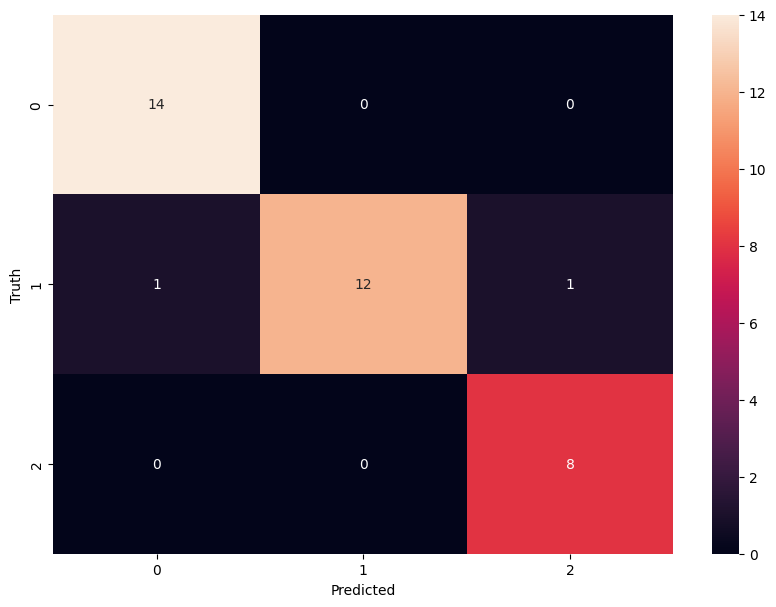

In [90]:
# plot the confusion matrix:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### let's try different techniques to improve the accuracy of our model:

Cross validation score: 0.6914285714285715


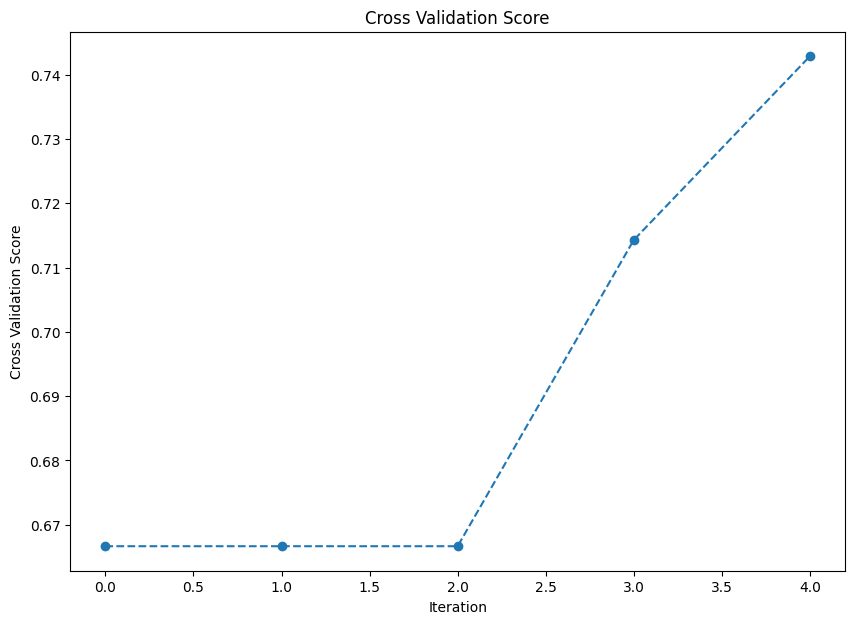

In [86]:
# cross validation:

cv_score = cross_val_score(model, X, y, cv=5)
print(f'Cross validation score: {cv_score.mean()}')

# plot the cross validation score:

plt.figure(figsize=(10, 7))
plt.plot(cv_score, marker='o', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Score')
plt.show()

The optimal number of neighbors is 13
Accuracy with optimal k: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



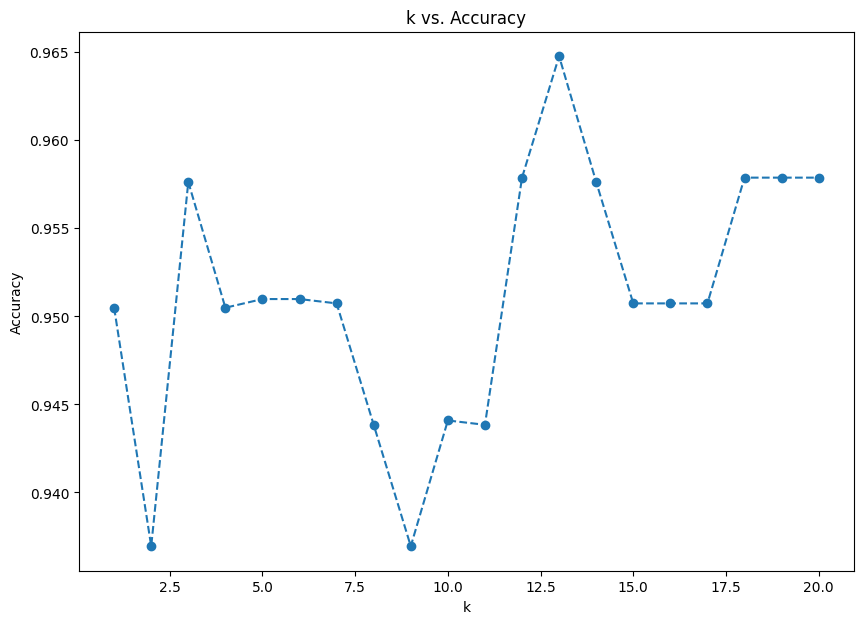

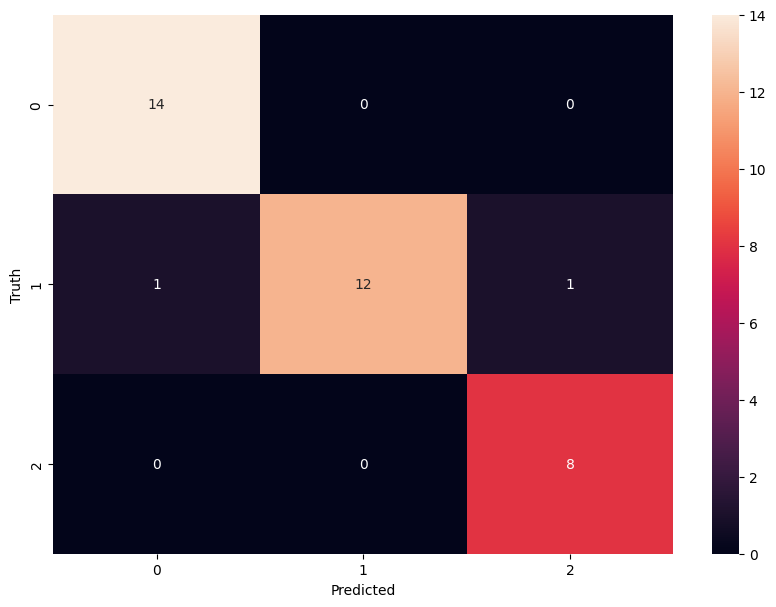

In [95]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of k values to test
k_values = range(1, 21)

# Use cross-validation to find the best k
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# Train the model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with optimal k:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the accuracy scores for each k value
plt.figure(figsize=(10, 7))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.show()

# plot the confusion matrix:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [92]:
# Try Manhattan distance
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Manhattan distance:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy with Manhattan distance: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 2 12  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



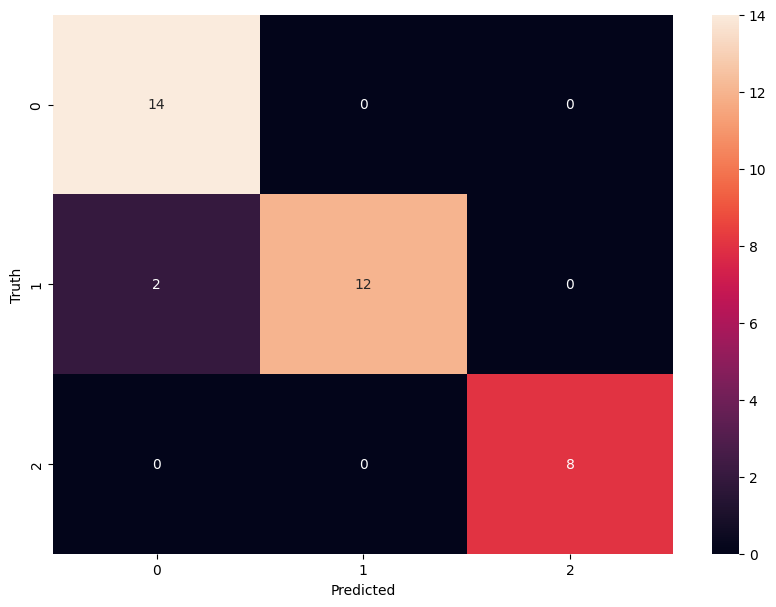

In [93]:
# plot the confusion matrix:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy with Chebyshev distance: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



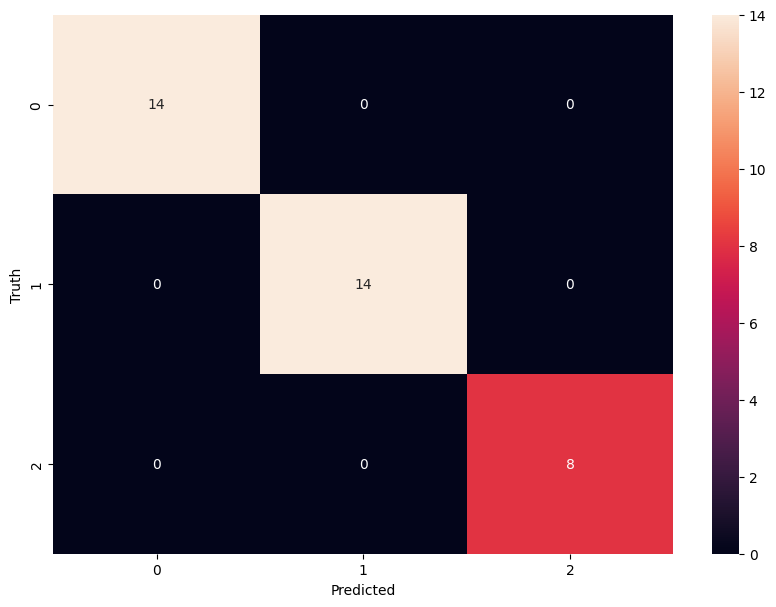

In [96]:
# Try Chebyshev distance
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Chebyshev distance:", accuracy)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# plot the confusion matrix:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [98]:
# Cross-validation to check for overfitting
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.93103448 0.86206897 1.         0.92857143 0.96428571]
Mean cross-validation score: 0.9371921182266011


In [99]:
# in the above case, the model is not overfitting because the cross validation score is consistent with the accuracy score.

---
### So, we learned how to implement the KNN algorithm using the scikit-learn library in Python. We also learned how to find the optimal value of k and how to use different distance metrics in the KNN algorithm. We also learned how to check for overfitting using cross-validation.

---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389